In [7]:
import pandas as pd
import sqlite3
import geopandas as gpd

In [4]:
conn = sqlite3.connect('soil_database')
c = conn.cursor()

c.execute('''  
SELECT * 
FROM soil_wetness
          ''')
wetness = pd.DataFrame(c.fetchall(),columns=['YEAR','JAN','FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANN','Name'])
wetness.head()

c.execute('''  
SELECT * 
FROM counties
          ''')

countydf = pd.DataFrame(c.fetchall(),columns=['county_fips_id','county_name'])


In [18]:
time = 2011
month = 'MAR'

In [71]:
finaldf = countydf.merge(wetness,left_on='county_name',right_on='Name', how='outer')
geodata = gpd.read_file('county_ca.geojson')
combineddf = geodata.merge(finaldf,left_on ='NAME', right_on = 'Name', how ='outer')
anndf =combineddf[['COUNTYFP', 'Name','YEAR','ANN','geometry' ]]
anndf = anndf[anndf['YEAR']==time]
monthdf = combineddf[['COUNTYFP','YEAR','JAN','FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','Name','geometry']]
monthdf =monthdf[monthdf['YEAR']==time]


In [57]:
monthdf.loc[:,('COUNTYFP',"YEAR",month,"Name",'geometry')]

,COUNTYFP,YEAR,AUG,Name,geometry
0,001,2011.0,0.29,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
28,095,2011.0,0.23,Solano,"POLYGON ((-122.10330 38.51330, -122.05740 38.5..."
42,099,2011.0,0.12,Stanislaus,"POLYGON ((-121.47260 37.48220, -121.47190 37.4..."
59,077,2011.0,0.16,San Joaquin,"POLYGON ((-121.58000 38.09440, -121.57550 38.1..."
88,113,2011.0,0.26,Yolo,"POLYGON ((-122.34020 38.92420, -121.83550 38.9..."
103,067,2011.0,0.24,Sacramento,"POLYGON ((-121.59330 38.31310, -121.52160 38.3..."
117,047,2011.0,0.10,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."


In [28]:
anndf

,COUNTYFP,Name,YEAR,ANN,geometry
0,001,Alameda,2011.0,0.58,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
28,095,Solano,2011.0,0.50,"POLYGON ((-122.10330 38.51330, -122.05740 38.5..."
42,099,Stanislaus,2011.0,0.48,"POLYGON ((-121.47260 37.48220, -121.47190 37.4..."
59,077,San Joaquin,2011.0,0.46,"POLYGON ((-121.58000 38.09440, -121.57550 38.1..."
88,113,Yolo,2011.0,0.51,"POLYGON ((-122.34020 38.92420, -121.83550 38.9..."
103,067,Sacramento,2011.0,0.50,"POLYGON ((-121.59330 38.31310, -121.52160 38.3..."
117,047,Merced,2011.0,0.43,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."


In [55]:
month = 'AUG'
time = 2011
if (month == 'ANN'):
    df =combineddf[['COUNTYFP', 'Name','YEAR','ANN','geometry' ]]
    df = df[df['YEAR']==time]
else:
    df = combineddf[['COUNTYFP','YEAR','JAN','FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','Name','geometry']]
    df =df[df['YEAR']==time]
    df =df.loc[:,('COUNTYFP',month,"Name",'geometry')]

df

,COUNTYFP,AUG,Name,geometry
0,001,0.29,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
28,095,0.23,Solano,"POLYGON ((-122.10330 38.51330, -122.05740 38.5..."
42,099,0.12,Stanislaus,"POLYGON ((-121.47260 37.48220, -121.47190 37.4..."
59,077,0.16,San Joaquin,"POLYGON ((-121.58000 38.09440, -121.57550 38.1..."
88,113,0.26,Yolo,"POLYGON ((-122.34020 38.92420, -121.83550 38.9..."
103,067,0.24,Sacramento,"POLYGON ((-121.59330 38.31310, -121.52160 38.3..."
117,047,0.10,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."


In [15]:
anndf

,COUNTYFP,Name,YEAR,ANN,geometry
0,001,Alameda,2011.0,0.58,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
28,095,Solano,2011.0,0.50,"POLYGON ((-122.10330 38.51330, -122.05740 38.5..."
42,099,Stanislaus,2011.0,0.48,"POLYGON ((-121.47260 37.48220, -121.47190 37.4..."
59,077,San Joaquin,2011.0,0.46,"POLYGON ((-121.58000 38.09440, -121.57550 38.1..."
88,113,Yolo,2011.0,0.51,"POLYGON ((-122.34020 38.92420, -121.83550 38.9..."
103,067,Sacramento,2011.0,0.50,"POLYGON ((-121.59330 38.31310, -121.52160 38.3..."
117,047,Merced,2011.0,0.43,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."


In [70]:
monthdf

,COUNTYFP,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Name,geometry
0,001,2011.0,0.80,0.80,0.86,0.84,0.70,0.58,0.48,0.29,0.17,0.44,0.48,0.48,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
28,095,2011.0,0.70,0.69,0.76,0.70,0.55,0.50,0.41,0.23,0.16,0.40,0.44,0.45,Solano,"POLYGON ((-122.10330 38.51330, -122.05740 38.5..."
42,099,2011.0,0.75,0.73,0.80,0.73,0.54,0.46,0.27,0.12,0.10,0.38,0.42,0.42,Stanislaus,"POLYGON ((-121.47260 37.48220, -121.47190 37.4..."
59,077,2011.0,0.70,0.70,0.77,0.70,0.52,0.45,0.32,0.16,0.12,0.35,0.39,0.38,San Joaquin,"POLYGON ((-121.58000 38.09440, -121.57550 38.1..."
88,113,2011.0,0.71,0.72,0.78,0.75,0.61,0.51,0.40,0.26,0.15,0.38,0.42,0.41,Yolo,"POLYGON ((-122.34020 38.92420, -121.83550 38.9..."
103,067,2011.0,0.73,0.72,0.79,0.76,0.62,0.51,0.38,0.24,0.14,0.37,0.40,0.39,Sacramento,"POLYGON ((-121.59330 38.31310, -121.52160 38.3..."
117,047,2011.0,0.71,0.69,0.73,0.66,0.48,0.41,0.20,0.10,0.09,0.34,0.40,0.38,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."


In [56]:
geodata

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,rmapshaperid,geometry
0,06,001,01675839,0500000US06001,06001,Alameda,06,1914240928,212981785,0,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912243121,12557304,1,"POLYGON ((-120.07240 38.70280, -119.96490 38.7..."
2,06,023,01681908,0500000US06023,06023,Humboldt,06,9241007147,1254299668,2,"POLYGON ((-124.06550 41.46470, -123.77060 41.4..."
3,06,033,00277281,0500000US06033,06033,Lake,06,3254288304,188912510,3,"POLYGON ((-122.88540 39.58010, -122.73560 39.5..."
4,06,037,00277283,0500000US06037,06037,Los Angeles,06,10510433235,1794939537,4,"MULTIPOLYGON (((-118.60440 33.47860, -118.5445..."
5,06,057,01682927,0500000US06057,06057,Nevada,06,2480638607,41513172,5,"POLYGON ((-121.02210 39.39160, -120.99230 39.4..."
6,06,081,00277305,0500000US06081,06081,San Mateo,06,1161542720,757525243,6,"POLYGON ((-122.50240 37.70810, -122.39140 37.7..."
7,06,085,00277307,0500000US06085,06085,Santa Clara,06,3341645574,35831344,7,"POLYGON ((-122.10870 37.46630, -122.04650 37.4..."
8,06,115,00277322,0500000US06115,06115,Yuba,06,1636983167,30986706,8,"POLYGON ((-121.62380 39.29560, -121.56400 39.3..."
9,06,045,00277287,0500000US06045,06045,Mendocino,06,9081415725,962953346,9,"POLYGON ((-124.02330 40.00130, -123.54450 40.0..."


In [ ]:
Alameda
Solano
Stanislaus
San Joaquin
Yolo
Sacramento
Merced

In [61]:
name = 'Merced'

NameError: name 'Merced' is not defined

In [72]:
monthdf = combineddf[['COUNTYFP','YEAR','JAN','FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','Name','geometry']]
monthdf 

,COUNTYFP,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Name,geometry
0,001,2011.0,0.80,0.80,0.86,0.84,0.70,0.58,0.48,0.29,0.17,0.44,0.48,0.48,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
1,001,2012.0,0.51,0.55,0.62,0.69,0.53,0.42,0.23,0.16,0.13,0.24,0.50,0.76,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
2,001,2013.0,0.82,0.77,0.69,0.57,0.46,0.26,0.17,0.15,0.22,0.23,0.30,0.48,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
3,001,2014.0,0.46,0.53,0.60,0.57,0.48,0.27,0.17,0.14,0.20,0.27,0.48,0.79,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
4,001,2015.0,0.83,0.82,0.73,0.59,0.50,0.41,0.21,0.16,0.14,0.20,0.49,0.59,Alameda,"POLYGON ((-122.31520 37.89680, -122.27110 37.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,047,2017.0,0.73,0.84,0.80,0.65,0.46,0.27,0.10,0.09,0.12,0.16,0.33,0.39,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
124,047,2018.0,0.46,0.45,0.53,0.51,0.38,0.18,0.11,0.09,0.09,0.14,0.23,0.52,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
125,047,2019.0,0.59,0.74,0.73,0.57,0.46,0.32,0.12,0.09,0.09,0.09,0.13,0.55,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
126,047,2020.0,0.55,0.51,0.49,0.49,0.38,0.17,0.09,0.09,0.08,0.08,0.27,0.38,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."


In [73]:
df = monthdf.loc[monthdf['Name']==name]

In [74]:
df

,COUNTYFP,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Name,geometry
117,047,2011.0,0.71,0.69,0.73,0.66,0.48,0.41,0.20,0.10,0.09,0.34,0.40,0.38,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
118,047,2012.0,0.38,0.45,0.47,0.49,0.37,0.21,0.11,0.09,0.08,0.16,0.37,0.57,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
119,047,2013.0,0.64,0.59,0.51,0.43,0.25,0.12,0.09,0.09,0.11,0.16,0.27,0.39,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
120,047,2014.0,0.30,0.44,0.47,0.44,0.28,0.12,0.09,0.09,0.10,0.15,0.42,0.55,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
121,047,2015.0,0.55,0.54,0.48,0.40,0.32,0.16,0.12,0.12,0.10,0.23,0.45,0.49,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
122,047,2016.0,0.62,0.65,0.65,0.55,0.44,0.22,0.10,0.08,0.08,0.23,0.45,0.51,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
123,047,2017.0,0.73,0.84,0.80,0.65,0.46,0.27,0.10,0.09,0.12,0.16,0.33,0.39,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
124,047,2018.0,0.46,0.45,0.53,0.51,0.38,0.18,0.11,0.09,0.09,0.14,0.23,0.52,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
125,047,2019.0,0.59,0.74,0.73,0.57,0.46,0.32,0.12,0.09,0.09,0.09,0.13,0.55,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."
126,047,2020.0,0.55,0.51,0.49,0.49,0.38,0.17,0.09,0.09,0.08,0.08,0.27,0.38,Merced,"POLYGON ((-121.22680 37.13480, -120.96420 37.3..."


In [79]:
newdf = df[['YEAR',month]]
newdf

,YEAR,AUG
117,2011.0,0.10
118,2012.0,0.09
119,2013.0,0.09
120,2014.0,0.09
121,2015.0,0.12
122,2016.0,0.08
123,2017.0,0.09
124,2018.0,0.09
125,2019.0,0.09
126,2020.0,0.09


In [85]:
newdf.rename(
    columns={"YEAR":"Years",month:'Surface Soil Wetness'},
    inplace=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_21976\2064678696.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
newdf

,Years,Surface Soil Wetness
117,2011.0,0.10
118,2012.0,0.09
119,2013.0,0.09
120,2014.0,0.09
121,2015.0,0.12
122,2016.0,0.08
123,2017.0,0.09
124,2018.0,0.09
125,2019.0,0.09
126,2020.0,0.09


In [87]:
import plotly.express as px
fig = px.bar(newdf,x='Years',y='Surface Soil Wetness')
fig.show()

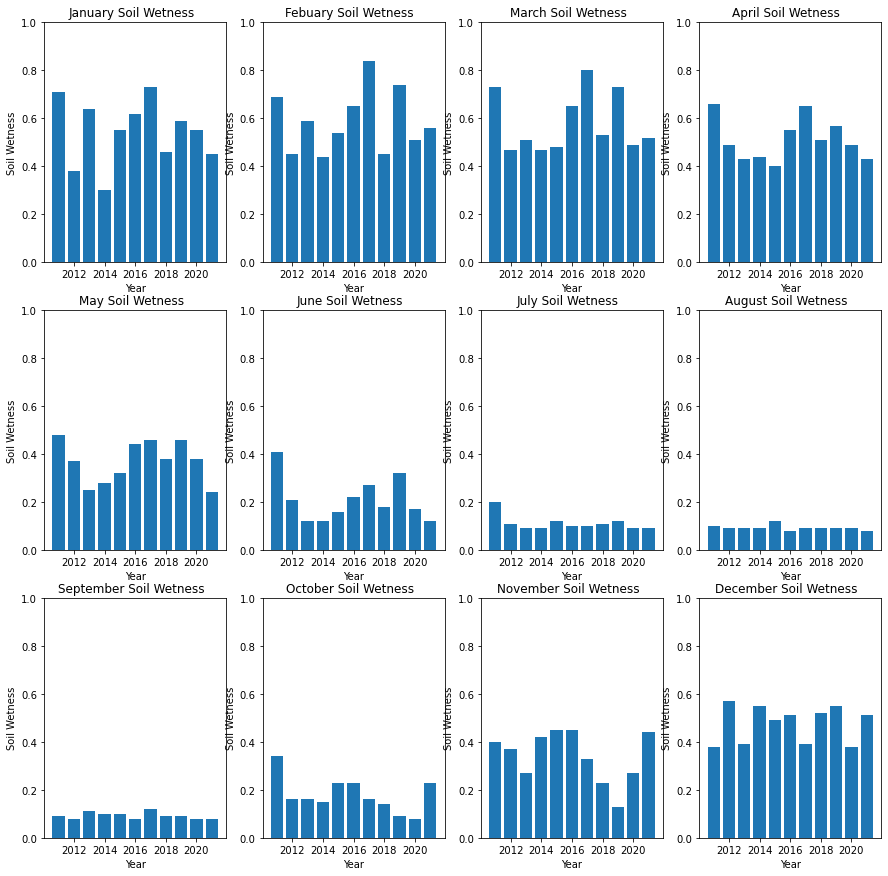

In [75]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 4,figsize = (15,15))
axs[0, 0].bar(newdf['YEAR'], newdf["JAN"])
axs[0, 0].set_title('January Soil Wetness  ')

axs[0, 1].bar(newdf['YEAR'], newdf["FEB"])
axs[0, 1].set_title('Febuary Soil Wetness  ')

axs[0, 2].bar(newdf['YEAR'], newdf["MAR"])
axs[0, 2].set_title('March Soil Wetness  ')

axs[0, 3].bar(newdf['YEAR'], newdf["APR"])
axs[0, 3].set_title('April Soil Wetness  ')

axs[1, 0].bar(newdf['YEAR'], newdf["MAY"])
axs[1, 0].set_title('May Soil Wetness  ')

axs[1, 1].bar(newdf['YEAR'], newdf["JUN"])
axs[1, 1].set_title('June Soil Wetness  ')

axs[1, 2].bar(newdf['YEAR'], newdf["JUL"])
axs[1, 2].set_title('July Soil Wetness  ')

axs[1, 3].bar(newdf['YEAR'], newdf["AUG"])
axs[1, 3].set_title('August Soil Wetness  ')

axs[2, 0].bar(newdf['YEAR'], newdf["SEP"])
axs[2, 0].set_title('September Soil Wetness  ')

axs[2, 1].bar(newdf['YEAR'], newdf["OCT"])
axs[2, 1].set_title('October Soil Wetness  ')

axs[2, 2].bar(newdf['YEAR'], newdf["NOV"])
axs[2, 2].set_title('November Soil Wetness  ')

axs[2, 3].bar(newdf['YEAR'], newdf["DEC"])
axs[2, 3].set_title('December Soil Wetness  ')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Soil Wetness')
    ax.set(ylim = (0,1))

In [88]:
conn = sqlite3.connect('soil_test_database')
c = conn.cursor()

c.execute('''  
SELECT * 
FROM soil_wetness
          ''')
wetness = pd.DataFrame(c.fetchall(),columns=['YEAR','JAN','FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANN','Name'])
wetness.head()

c.execute('''  
SELECT * 
FROM counties
          ''')

countydf = pd.DataFrame(c.fetchall(),columns=['county_fips_id','county_name'])

In [94]:
wetness.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Name
0,2011,0.80,0.80,0.86,0.84,0.70,0.58,0.48,0.29,0.17,0.44,0.48,0.48,0.58,Alameda
1,2012,0.51,0.55,0.62,0.69,0.53,0.42,0.23,0.16,0.13,0.24,0.50,0.76,0.45,Alameda
2,2013,0.82,0.77,0.69,0.57,0.46,0.26,0.17,0.15,0.22,0.23,0.30,0.48,0.42,Alameda
3,2014,0.46,0.53,0.60,0.57,0.48,0.27,0.17,0.14,0.20,0.27,0.48,0.79,0.41,Alameda
4,2015,0.83,0.82,0.73,0.59,0.50,0.41,0.21,0.16,0.14,0.20,0.49,0.59,0.47,Alameda


In [96]:
wetness.loc[wetness['Name']=='Alameda']

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Name
0,2011,0.80,0.80,0.86,0.84,0.70,0.58,0.48,0.29,0.17,0.44,0.48,0.48,0.58,Alameda
1,2012,0.51,0.55,0.62,0.69,0.53,0.42,0.23,0.16,0.13,0.24,0.50,0.76,0.45,Alameda
2,2013,0.82,0.77,0.69,0.57,0.46,0.26,0.17,0.15,0.22,0.23,0.30,0.48,0.42,Alameda
3,2014,0.46,0.53,0.60,0.57,0.48,0.27,0.17,0.14,0.20,0.27,0.48,0.79,0.41,Alameda
4,2015,0.83,0.82,0.73,0.59,0.50,0.41,0.21,0.16,0.14,0.20,0.49,0.59,0.47,Alameda
5,2016,0.79,0.82,0.86,0.80,0.63,0.48,0.28,0.16,0.14,0.36,0.59,0.71,0.55,Alameda
6,2017,0.90,0.95,0.91,0.87,0.70,0.51,0.34,0.17,0.16,0.21,0.47,0.52,0.55,Alameda
7,2018,0.64,0.62,0.71,0.69,0.53,0.43,0.21,0.15,0.14,0.21,0.29,0.62,0.44,Alameda
8,2019,0.77,0.89,0.91,0.84,0.70,0.53,0.41,0.20,0.20,0.18,0.20,0.66,0.54,Alameda
9,2020,0.72,0.66,0.61,0.62,0.50,0.35,0.18,0.15,0.13,0.12,0.31,0.49,0.41,Alameda


In [172]:
conn = sqlite3.connect('soil_test_database')
c = conn.cursor()

c.execute('''  
SELECT YEAR,Feb, Name, ANN 
FROM soil_wetness

          ''')
wetness = pd.DataFrame(c.fetchall(),columns=['YEAR','Feb','Name', 'ANN'])
wetness.head()


c.execute('''  
SELECT *
FROM soil_wetness

          ''')
newdata = pd.DataFrame(c.fetchall(),columns = ['YEAR','JAN','FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANN','Name'])



c.execute('''  
SELECT * 
FROM counties
          ''')

countydf = pd.DataFrame(c.fetchall(),columns=['county_fips_id','county_name'])

In [143]:
wetness.head()

,YEAR,Feb,Name,ANN
0,2011,0.80,Alameda,0.58
1,2012,0.55,Alameda,0.45
2,2013,0.77,Alameda,0.42
3,2014,0.53,Alameda,0.41
4,2015,0.82,Alameda,0.47


In [109]:
wetness['1/1/2011'] = wetness['JAN']

pd.to_datetime(wetness['YEAR'], format = '%Y-%m')

0     1970-01-01 00:00:00.000002011
1     1970-01-01 00:00:00.000002012
2     1970-01-01 00:00:00.000002013
3     1970-01-01 00:00:00.000002014
4     1970-01-01 00:00:00.000002015
                   ...             
633   1970-01-01 00:00:00.000002017
634   1970-01-01 00:00:00.000002018
635   1970-01-01 00:00:00.000002019
636   1970-01-01 00:00:00.000002020
637   1970-01-01 00:00:00.000002021
Name: YEAR, Length: 638, dtype: datetime64[ns]

In [112]:
wetness.dtypes

YEAR      int64
JAN     float64
Name     object
dtype: object

In [123]:
wetness['YEAR'] = wetness['YEAR'].astype('str')

In [116]:
wetness

,YEAR,JAN,Name
0,2011,0.80,Alameda
1,2012,0.51,Alameda
2,2013,0.82,Alameda
3,2014,0.46,Alameda
4,2015,0.83,Alameda
...,...,...,...
633,2017,0.73,Merced
634,2018,0.46,Merced
635,2019,0.59,Merced
636,2020,0.55,Merced


In [180]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]

months = str(months)

wetness['test'] = pd.to_datetime(wetness['YEAR'], format = '%Y-%m')
wetness['Month'] = months
wetness['Day'] = '1'


In [181]:
wetness

,YEAR,Feb,Name,ANN,test,Month,Day
0,2011,0.80,Alameda,0.58,1970-01-01 00:00:00.000002011,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
1,2012,0.55,Alameda,0.45,1970-01-01 00:00:00.000002012,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
2,2013,0.77,Alameda,0.42,1970-01-01 00:00:00.000002013,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
3,2014,0.53,Alameda,0.41,1970-01-01 00:00:00.000002014,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
4,2015,0.82,Alameda,0.47,1970-01-01 00:00:00.000002015,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
...,...,...,...,...,...,...,...
633,2017,0.84,Merced,0.41,1970-01-01 00:00:00.000002017,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
634,2018,0.45,Merced,0.30,1970-01-01 00:00:00.000002018,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
635,2019,0.74,Merced,0.37,1970-01-01 00:00:00.000002019,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1
636,2020,0.51,Merced,0.30,1970-01-01 00:00:00.000002020,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1


In [182]:
wetness['test'] = pd.to_datetime(wetness[['YEAR','Month','Day']], format = '%Y-%m')


ValueError: Unable to parse string "[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]" at position 0

In [178]:
wetness

,YEAR,Feb,Name,ANN,test,Month,Day
0,2011,0.80,Alameda,0.58,2011-02-01,2,1
1,2012,0.55,Alameda,0.45,2012-02-01,2,1
2,2013,0.77,Alameda,0.42,2013-02-01,2,1
3,2014,0.53,Alameda,0.41,2014-02-01,2,1
4,2015,0.82,Alameda,0.47,2015-02-01,2,1
...,...,...,...,...,...,...,...
633,2017,0.84,Merced,0.41,2017-02-01,2,1
634,2018,0.45,Merced,0.30,2018-02-01,2,1
635,2019,0.74,Merced,0.37,2019-02-01,2,1
636,2020,0.51,Merced,0.30,2020-02-01,2,1


In [160]:
df = wetness[["Feb",'test','Name']]

In [161]:
df

,Feb,test,Name
0,0.80,2011-02-01,Alameda
1,0.55,2012-02-01,Alameda
2,0.77,2013-02-01,Alameda
3,0.53,2014-02-01,Alameda
4,0.82,2015-02-01,Alameda
...,...,...,...
633,0.84,2017-02-01,Merced
634,0.45,2018-02-01,Merced
635,0.74,2019-02-01,Merced
636,0.51,2020-02-01,Merced


In [173]:
newdata

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Name
0,2011,0.80,0.80,0.86,0.84,0.70,0.58,0.48,0.29,0.17,0.44,0.48,0.48,0.58,Alameda
1,2012,0.51,0.55,0.62,0.69,0.53,0.42,0.23,0.16,0.13,0.24,0.50,0.76,0.45,Alameda
2,2013,0.82,0.77,0.69,0.57,0.46,0.26,0.17,0.15,0.22,0.23,0.30,0.48,0.42,Alameda
3,2014,0.46,0.53,0.60,0.57,0.48,0.27,0.17,0.14,0.20,0.27,0.48,0.79,0.41,Alameda
4,2015,0.83,0.82,0.73,0.59,0.50,0.41,0.21,0.16,0.14,0.20,0.49,0.59,0.47,Alameda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2017,0.73,0.84,0.80,0.65,0.46,0.27,0.10,0.09,0.12,0.16,0.33,0.39,0.41,Merced
634,2018,0.46,0.45,0.53,0.51,0.38,0.18,0.11,0.09,0.09,0.14,0.23,0.52,0.30,Merced
635,2019,0.59,0.74,0.73,0.57,0.46,0.32,0.12,0.09,0.09,0.09,0.13,0.55,0.37,Merced
636,2020,0.55,0.51,0.49,0.49,0.38,0.17,0.09,0.09,0.08,0.08,0.27,0.38,0.30,Merced


In [179]:
newdata['YEAR'] = newdata['YEAR'].astype('str')


newdata['Month'] = '1'
newdata['Day'] = '1'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Month','Day']], format = '%Y-%m')
newdata['Feb'] = '2'
newdata['test'] = pd.to_datetime(wetness[['YEAR','Feb','Day']], format = '%Y-%m')
newdata['Mar'] = '3'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Mar','Day']], format = '%Y-%m')
newdata['Apr'] = '4'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Apr','Day']], format = '%Y-%m')
newdata['May'] = '5'

newdata['test'] = pd.to_datetime(wetness[['YEAR','May','Day']], format = '%Y-%m')
newdata['Jun'] = '6'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Jun','Day']], format = '%Y-%m')
newdata['Jul'] = '7'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Jul','Day']], format = '%Y-%m')
newdata['Aug'] = '8'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Aug','Day']], format = '%Y-%m')
newdata['Sep'] = '9'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Sep','Day']], format = '%Y-%m')
newdata['Oct'] = '10'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Oct','Day']], format = '%Y-%m')
newdata['Nov'] = '11'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Nov','Day']], format = '%Y-%m')
newdata['Dec'] = '12'

newdata['test'] = pd.to_datetime(wetness[['YEAR','Dec','Day']], format = '%Y-%m')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

In [163]:
newdata['YEAR'] = newdata['YEAR'].astype('str')

In [183]:
newdata

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Name,Jan,Day,Month,test,Feb
0,2011,0.80,0.80,0.86,0.84,0.70,0.58,0.48,0.29,0.17,0.44,0.48,0.48,0.58,Alameda,1,1,1,2011-02-01,2
1,2012,0.51,0.55,0.62,0.69,0.53,0.42,0.23,0.16,0.13,0.24,0.50,0.76,0.45,Alameda,1,1,1,2012-02-01,2
2,2013,0.82,0.77,0.69,0.57,0.46,0.26,0.17,0.15,0.22,0.23,0.30,0.48,0.42,Alameda,1,1,1,2013-02-01,2
3,2014,0.46,0.53,0.60,0.57,0.48,0.27,0.17,0.14,0.20,0.27,0.48,0.79,0.41,Alameda,1,1,1,2014-02-01,2
4,2015,0.83,0.82,0.73,0.59,0.50,0.41,0.21,0.16,0.14,0.20,0.49,0.59,0.47,Alameda,1,1,1,2015-02-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2017,0.73,0.84,0.80,0.65,0.46,0.27,0.10,0.09,0.12,0.16,0.33,0.39,0.41,Merced,1,1,1,2017-02-01,2
634,2018,0.46,0.45,0.53,0.51,0.38,0.18,0.11,0.09,0.09,0.14,0.23,0.52,0.30,Merced,1,1,1,2018-02-01,2
635,2019,0.59,0.74,0.73,0.57,0.46,0.32,0.12,0.09,0.09,0.09,0.13,0.55,0.37,Merced,1,1,1,2019-02-01,2
636,2020,0.55,0.51,0.49,0.49,0.38,0.17,0.09,0.09,0.08,0.08,0.27,0.38,0.30,Merced,1,1,1,2020-02-01,2


In [ ]:

newdata['Year'] = pd.to_datetime(wetness['YEAR'], format = '%Y-%m')
wetness['Month'] = '2'
wetness['Day'] = '1'